### Metrics for QA

There are two dominant metrics used by many question answering datasets, including SQuAD: exact match (EM) and F1 score. These scores are computed on individual question+answer pairs. When multiple correct answers are possible for a given question, the maximum score over all possible correct answers is computed. Overall EM and F1 scores are computed for a model by averaging over the individual example scores.

### Exact Match

This metric is as simple as it sounds. For each question+answer pair, if the characters of the model's prediction exactly match the characters of (one of) the True Answer(s), EM = 1, otherwise EM = 0. This is a strict all-or-nothing metric; being off by a single character results in a score of 0. When assessing against a negative example, if the model predicts any text at all, it automatically receives a 0 for that example.

### F1

F1 score is a common metric for classification problems, and widely used in QA. It is appropriate when we care equally about precision and recall. In this case, it's computed over the individual words in the prediction against those in the True Answer. The number of shared words between the prediction and the truth is the basis of the F1 score: precision is the ratio of the number of shared words to the total number of words in the prediction, and recall is the ratio of the number of shared words to the total number of words in the ground truth.

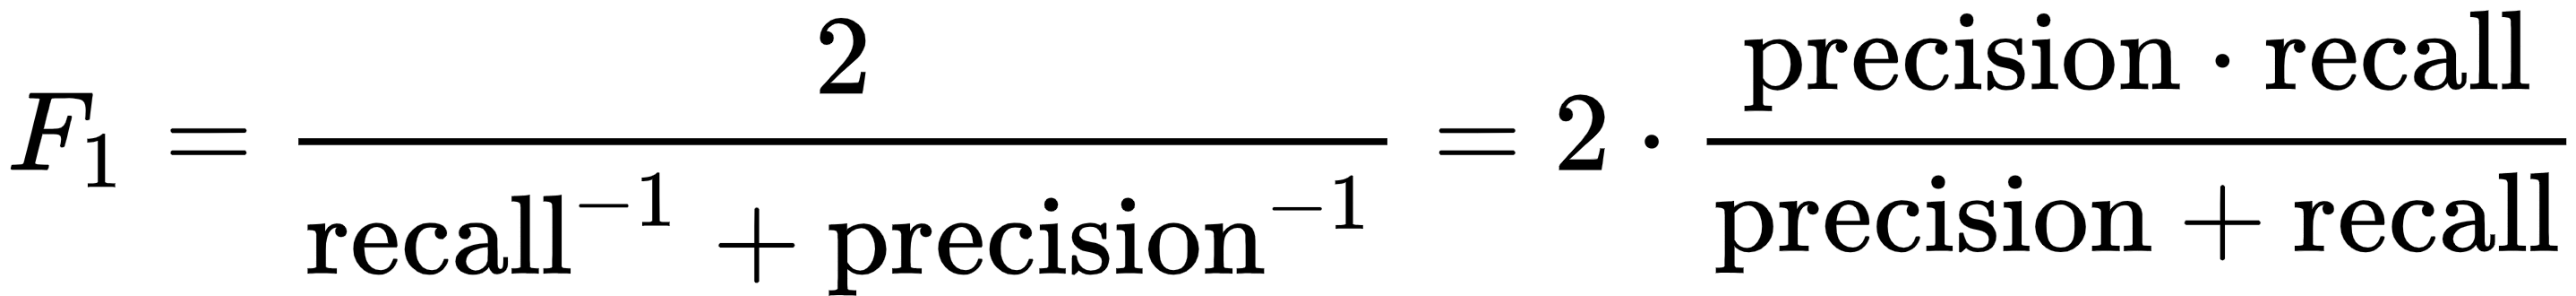

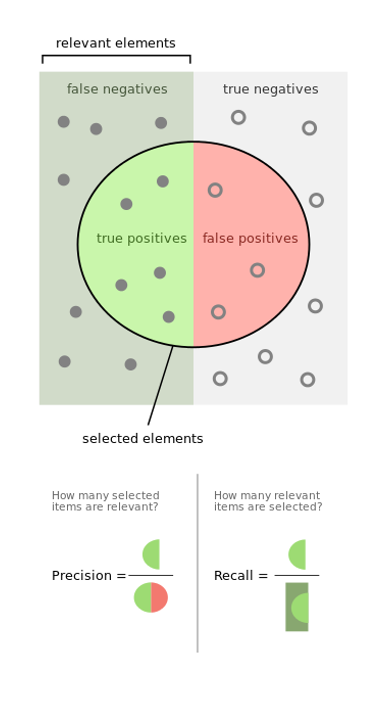

### Let's see how these metrics work in practice. 

In [1]:
import numpy as np

In [63]:
# ground_truth = np.array([np.random.randint(0, 100, size=10), np.random.randint(101, 200, size=10)])
# predicted = np.array([np.random.randint(0, 100, size=10), np.random.randint(101, 200, size=10)])

# ground_truth

In [82]:
# ground_truth = np.array([np.arange(0,10), np.arange(10,20)])
# predicted = np.array([np.arange(0,10), np.arange(10,20)])

# ground_truth

In [84]:
ground_truth = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
predicted = np.array([[2, 1, 3, 3, 5], [5, 8, 7, 9, 10]])

ground_truth

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [121]:
def exact_match(pred_tokens, true_tokens):
    '''
    A straightforward way to check the equality of the two lists in Python 
    is by using the equality == operator. 
    When the equality == is used on the list type in Python, 
    it returns True if the lists are equal and False if they are not.
    '''
    return int(pred_tokens==true_tokens)
    

def get_prec_rec_f1(pred_tokens, true_tokens):
    
    # if either the prediction or the truth is no-answer then f1 = 1 if they agree, 0 otherwise
    if len(pred_tokens) == 0 or len(true_tokens) == 0:
        prec = rec = f1 = 1
        return prec, rec, f1
    
    common_tokens = set(pred_tokens) & set(true_tokens)
    # if there are no common tokens then f1 = 0
    if len(common_tokens) == 0:
        prec = rec = f1 = 0
        return prec, rec, f1
    
    prec = len(common_tokens) / len(pred_tokens)
    rec = len(common_tokens) / len(true_tokens)
    f1 = 2 * (prec * rec) / (prec + rec)
    
    return prec, rec, f1


for i in range (predicted.shape[1]):
    ps = predicted[0][i]
    pe = predicted[1][i]
    
    gs = ground_truth[0][i]
    ge = ground_truth[1][i]
    
    pred_tokens = [i for i in range(ps, pe+1)]
    true_tokens = [i for i in range(gs, ge+1)]
    
    match =  exact_match(pred_tokens, true_tokens)
    score =  get_prec_rec_f1(pred_tokens, true_tokens)
    
    print(ps, pe, ':', gs, ge, '::', match, ':', score)
    

2 5 : 1 6 :: 0 : (1.0, 0.6666666666666666, 0.8)
1 8 : 2 7 :: 0 : (0.75, 1.0, 0.8571428571428571)
3 7 : 3 8 :: 0 : (1.0, 0.8333333333333334, 0.9090909090909091)
3 9 : 4 9 :: 0 : (0.8571428571428571, 1.0, 0.923076923076923)
5 10 : 5 10 :: 1 : (1.0, 1.0, 1.0)


In [91]:
# a) Overall EM and F1 scores are computed for a model by averaging over the individual example scores.

Reference: https://qa.fastforwardlabs.com/no%20answer/null%20threshold/bert/distilbert/exact%20match/f1/robust%20predictions/2020/06/09/Evaluating_BERT_on_SQuAD.html#F1